# Аппроксимация функции
## Функция
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
## Задача
1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42).
4. Отправьте ответ, разделив числа (w_0, w_1, w_2, w_3) пробелами.

In [146]:
import numpy as np
import pandas as pd
import scipy as sc
import math
import matplotlib.pyplot as plt

from scipy import linalg

In [147]:
def func_to_appr(x: float):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5.0 * math.exp(- x / 2.0)

In [148]:
x_min = 1.0
x_max = 15.0

In [149]:
x_list = [x_min, 4.0, 10, x_max]

In [150]:
A = np.array(
            [
                [1, x_min],
                [1, x_max],
            ]
        )
b = np.array([func_to_appr(x_min), func_to_appr(x_max)])
A, b

(array([[ 1.,  1.],
        [ 1., 15.]]),
 array([3.25221687, 0.63522142]))

In [151]:
def create_coeff_matrix(x_list):
    n_columns_rows = len(x_list)
    matrix_list = []
    for x in x_list:
        row = [x**i for i in range(n_columns_rows)]
        matrix_list.append(row)
    return matrix_list

In [152]:
def create_func_val_vector(x_list):
    func_cal_vector = np.array([func_to_appr(x) for x in x_list])
    return func_cal_vector

In [153]:
A = np.array(create_matrix(x_list))
b = np.array(create_func_val_vector(x_list))
A, b

(array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
        [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
        [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]]),
 array([3.25221687, 1.74684595, 2.50541641, 0.63522142]))

In [154]:
polynomial_coeffs = linalg.solve(A, b)

In [155]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    terms_amount = len(coeffs)
    y = 0
    for i in range(terms_amount):
        y += coeffs[i]*x**i
    return y

In [156]:
polinome_coeffs

array([ 3.43914511, -0.18692825])

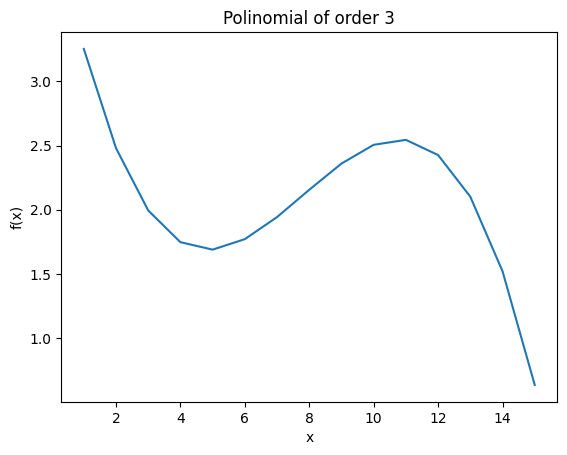

In [157]:
fig, ax = plt.subplots()
ax.set_title(f'Polinomial of order {len(polynomial_coeffs) - 1}')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
x = np.linspace(1, 15, 15)
plt.plot(x, PolyCoefficients(x, polynomial_coeffs))
plt.show()

In [158]:
polynomial_coeffs

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])